In [1]:
import time
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection

from skimage.feature import daisy
from skimage import color

%matplotlib inline

In [2]:
from src.data import Data
from src.plothelp import * 
import src.data_set_image_manip

In [3]:
data = Data("img")
data.load_pickle("100x100.pickle")
X_train, X_test, y_train, y_test = data.train_test_split()

In [5]:
features = []
for image in X_test:
  image_gray = color.rgb2gray(image)  
  descs = daisy(image_gray, step=100, radius=10, rings=2, histograms=8,orientations=8, visualize=False)
  features.append(descs)

AttributeError: 'list' object has no attribute 'shape'

In [7]:
print(features)

[array([[[ 0.00386737,  0.00409186,  0.00433364,  0.00413374,  0.00454984,
          0.00672115,  0.00679794,  0.00485608,  0.00299001,  0.00333717,
          0.00526749,  0.00607147,  0.00485703,  0.00585277,  0.00895075,
          0.00626285,  0.00373895,  0.00474167,  0.00713882,  0.00777607,
          0.00694723,  0.00849754,  0.00931174,  0.0058294 ,  0.0082899 ,
          0.0118478 ,  0.01150226,  0.00733337,  0.00675035,  0.01277686,
          0.0122414 ,  0.00711159,  0.01525317,  0.01395568,  0.00855245,
          0.00436642,  0.00289033,  0.0062786 ,  0.01160027,  0.01360747,
          0.00602584,  0.00295838,  0.00158864,  0.00159846,  0.00318077,
          0.00844481,  0.01382907,  0.01112977,  0.00200541,  0.00201305,
          0.00347559,  0.00643749,  0.00796321,  0.00682259,  0.00571788,
          0.00347089,  0.00600544,  0.01077685,  0.01369476,  0.01578054,
          0.01413308,  0.00662965,  0.00292768,  0.00283365,  0.00574026,
          0.01159679,  0.01431343,  0

In [ ]:
features = []
for image in X_train:
  image_gray = color.rgb2gray(image)  
  descs = daisy(image_gray, step=100, radius=10, rings=2, histograms=8,orientations=8, visualize=False)
  features.append(descs)

(4698, 100, 100, 3)


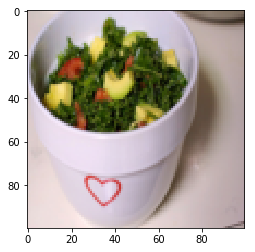

In [9]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
print(X_train.shape)
plt.imshow(X_train[398].astype('uint8'))# plot image from the dataset to see how it looks


X_trains = np.reshape(X_train, (X_train.shape[0], -1)) #flatten the image
X_tests = np.reshape(X_test, (X_test.shape[0], -1)) #

In [ ]:
from sklearn.decomposition import PCA

n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_trains)

X_train_pca = pca.transform(X_trains)
X_test_pca = pca.transform(X_tests)

In [ ]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

end = time.time()
elapsed = end - start
print("Classifier train in ", elapsed, "seconds")

In [ ]:
y=logreg.predict(X_test_pca)
print("Test Data accuracy  score", accuracy_score(y, y_test)*100,"%")